<a href="https://colab.research.google.com/github/noahgift/aws-ml-guide/blob/master/Lesson4_AWSML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 4 Machine Learning Modeling on AWS

[Watch Lesson 4:  Machine Learning Modeling on AWS Video](https://learning.oreilly.com/videos/aws-certified-machine/9780135556597/9780135556597-ACML_01_04_00)

## Pragmatic AI Labs



![alt text](https://paiml.com/images/logo_with_slogan_white_background.png)

This notebook was produced by [Pragmatic AI Labs](https://paiml.com/).  You can continue learning about these topics by:

*   Buying a copy of [Pragmatic AI: An Introduction to Cloud-Based Machine Learning](http://www.informit.com/store/pragmatic-ai-an-introduction-to-cloud-based-machine-9780134863863) from Informit.
*   Buying a copy of  [Pragmatic AI: An Introduction to Cloud-Based Machine Learning](https://www.amazon.com/Pragmatic-AI-Introduction-Cloud-Based-Learning/dp/0134863860) from Amazon
*   Reading an online copy of [Pragmatic AI:Pragmatic AI: An Introduction to Cloud-Based Machine Learning](https://www.safaribooksonline.com/library/view/pragmatic-ai-an/9780134863924/)
*  Watching video [Essential Machine Learning and AI with Python and Jupyter Notebook-Video-SafariOnline](https://www.safaribooksonline.com/videos/essential-machine-learning/9780135261118) on Safari Books Online.
* Watching video [AWS Certified Machine Learning-Speciality](https://learning.oreilly.com/videos/aws-certified-machine/9780135556597)
* Purchasing video [Essential Machine Learning and AI with Python and Jupyter Notebook- Purchase Video](http://www.informit.com/store/essential-machine-learning-and-ai-with-python-and-jupyter-9780135261095)
*   Viewing more content at [noahgift.com](https://noahgift.com/)


## Load AWS API Keys

Put keys in local or remote GDrive:  

`cp ~/.aws/credentials /Users/myname/Google\ Drive/awsml/`

### Mount GDrive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['kaggle.json', 'credentials', 'config']

### Install Boto

In [0]:
!pip -q install boto3


### Create API Config

In [0]:
!mkdir -p ~/.aws &&\
  cp /content/gdrive/My\ Drive/awsml/credentials ~/.aws/credentials 

### Test Comprehend API Call

In [0]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-1")
text = "There is smoke in San Francisco"
comprehend.detect_sentiment(Text=text, LanguageCode='en')

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '160',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 22 Nov 2018 00:21:54 GMT',
   'x-amzn-requestid': '9d69a0a9-edec-11e8-8560-532dc7aa62ea'},
  'HTTPStatusCode': 200,
  'RequestId': '9d69a0a9-edec-11e8-8560-532dc7aa62ea',
  'RetryAttempts': 0},
 'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Mixed': 0.008628507144749165,
  'Negative': 0.1037612184882164,
  'Neutral': 0.8582549691200256,
  'Positive': 0.0293553676456213}}

## 4.1 AWS ML Systems Overview

### Machine Learning at AWS


* [AWS ML Services Video](https://www.aws.training/learningobject/video?id=16207&trk=gs_card)
* [AWS Machine Learning Overview Video](https://www.aws.training/learningobject/video?id=16363&trk=gs_card)

* Thousands of Engineers working on Machine Learning at AWS


#### What is Machine Learning?

![aiml](https://user-images.githubusercontent.com/58792/48925854-4de55d00-ee7d-11e8-8656-f92b2a2d3aed.png)

*   Subset of AI
*   Deep Learning is subset of Machine Learning



#### What can Machine Learning Do?



* Make predictions
* Optimize utility functions
* Extract hidden data structures
* Classify data

#### Machine Learning Use Cases

##### Fraud Detection

  

  - Mine data
  - Identify hidden patterns and create labels (unsupervised learning)
  - Train model
  - Flag transaction as fraudulent
  

##### Content Personalization


  - Use predictive analytics to recommend items (recommendation systems)

##### Target Marketing

* Use custom activity to choose revelant email campaigns
* cross-selling
* upselling

##### Categorization

* Matching hiring managers and resumes
* Unstructured content --> Machine Learning Model --> Categorized documents

##### Customer Service

* Analyze social media traffic to route customers to customer support
* Predictive routing of customer emails

#### Machine Learning Concepts

![Ml Modeling](https://user-images.githubusercontent.com/58792/49088318-dc573700-f20d-11e8-825c-d034f060b395.png)

**Combination of Methods and Systems**

* **Predict**
  - Predict new data based on observed data
* **Extract**
  - Extract hidden structure from data
* **Summarize**
  - Summarize data into executive brief
* **Optimize**
  - Optimize an action, given a cost function and observed data
* **Adapt**
  - Adapt based on observed data

#### Machine Learning Types

![Machine Learning Types](https://user-images.githubusercontent.com/58792/48926326-c77f4a00-ee81-11e8-8066-84c922df39d2.png)

* Supervised Learning
  - Labels are known for inputs and outputs
  - Model "learns" to generalize from data (records)
  - Human needs to tell model which outputs are correct (to train model)
  - Input --> Model --> Output/Prediction
  - Classification (Category like "red", "blue") and Regression (Numerical i.e. Housing price)
 
* Unsupervised Learning
  - Labels are not known
  - Lables "hidden structures" are discovered
  - Self-organization
  - Clustering
 
* Reinforcement Learning
  - Model learns by interacting with environment
  - Learns to take action to maximize total reward
  - Inspired by behavioral biology
 
  
  

#### Frameworks & Infrastructure

* All Major frameworks
  - Apache MXNet
  - Caffe and Caffe 2
  - Tensorflow

#### Machine learning platforms

* Fully managed platform for building models with own data
  - Apache Spark on EMR
  - SparkML (25 PetaByte models, Zillow and Netflix) 
  - Sagemaker
  - Amazon Machine Learning

#### API-driven services

Examples include:



*   Comprehend (NLP)
*   Rekognition (Computer Vision)



#### Models

* Can be stored in S3
* Can be A/B tested

#### Optimized Instances & Machine Images

* Deep Learning AMIs
* Containers

## 4.2 Feature Engineering


### Feature Engineering Overview



*   Feature is an attribute used in a prediction model
*   Feature engineering is the creation and curation of these attributes



### Explore Features

In [0]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/noahgift/aws-ml-guide/master/data/banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Correlation Heatmap

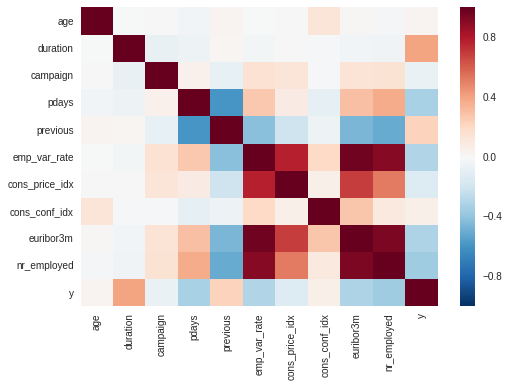

In [0]:
sns.heatmap(df.corr())

#### Yellowbrick Road Feature Rank

Can use [yellowbrick road](http://www.scikit-yb.org/en/latest/index.html) to visualize feature importance

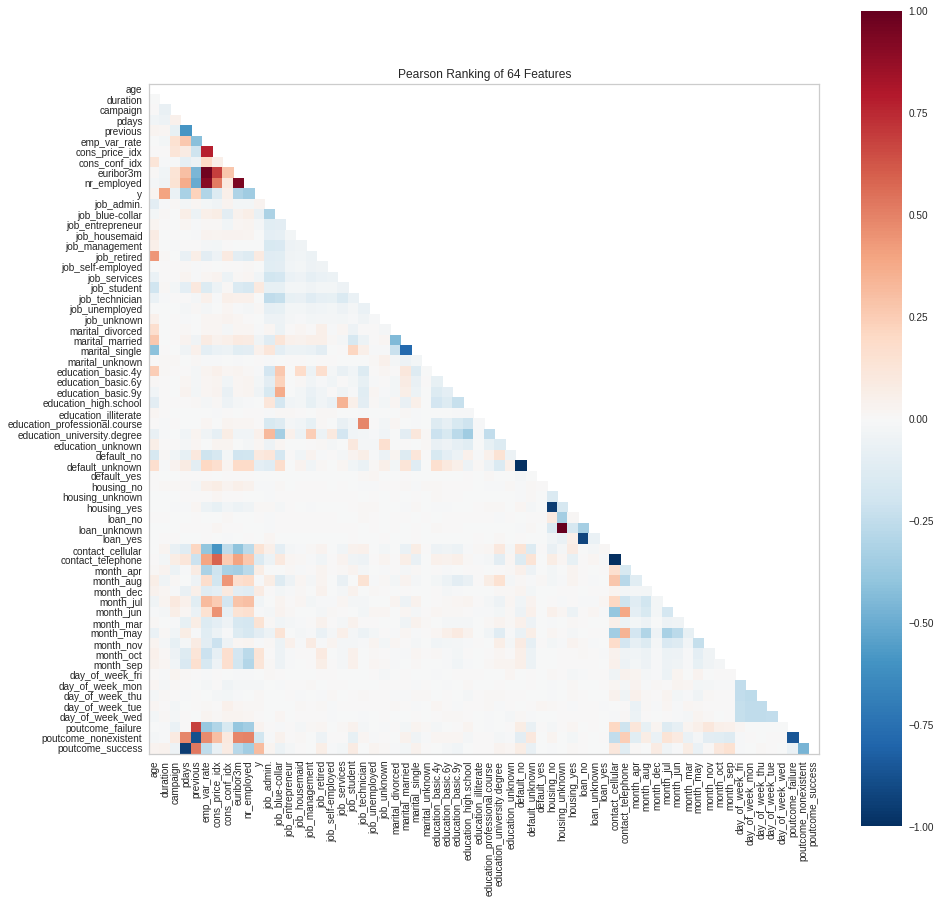

In [0]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm="pearson", size=(1080, 1080))
visualizer.fit_transform(pd.get_dummies(df))
visualizer.poof()

### Demo AWS Machine Learning Service


*  [Tutorial:  Amazon ML to Predict Reponses to a ML Offer](https://docs.aws.amazon.com/machine-learning/latest/dg/tutorial.html)

*   Create Training Datasource (Steps Below)



*   Prepare Data 
 ** - Create S3 Bucket & Create folder**
  ![s3bucket](https://user-images.githubusercontent.com/58792/49109353-548a2080-f23f-11e8-8700-5fb512005655.png)
  
**  - Upload CSV files**
![csv_file](https://user-images.githubusercontent.com/58792/49109351-548a2080-f23f-11e8-82fa-ade76fe73bdc.png)

  
 
**  - Create Data Source **

![create data source](https://user-images.githubusercontent.com/58792/49109714-45f03900-f240-11e8-8272-f65d4eafe2ca.png)





**Infer the Schema**

Amazon Machine Learning Service infers the proper schema


![Infer the Schema](https://user-images.githubusercontent.com/58792/49111125-15120300-f244-11e8-9116-abeb5288fa3d.png)


**Select the Target**


![target](https://user-images.githubusercontent.com/58792/49111259-74701300-f244-11e8-94aa-124f9fb640c1.png)

## 4.3 Train a Model

#### Create 70/30 Split and Train Model in sklearn

In [0]:
banking_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/aws-ml-guide/master/data/banking.csv")
banking_df.columns #y column will be predicted

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### One Hot Encode with sklearn

[One Hot Encode Categories](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer(sparse=False)
vectorized_banking_df = dvec.fit_transform(df.transpose().to_dict().values())
train, test = train_test_split(vectorized_banking_df, test_size=0.3)

print(f" 70% Split data structure: {type(train)} and shape: {train.shape}")
print(f" 30% Split data structure: {type(test)} and shape: {test.shape}")


 70% Split data structure: <class 'numpy.ndarray'> and shape: (28831, 64)
 30% Split data structure: <class 'numpy.ndarray'> and shape: (12357, 64)


#### Use Logistic Regression to train model on 70% train data

In [0]:
from sklearn.linear_model import LogisticRegression

X = train[:,:-1]  #drop the predict 'y'
print(f" Drop last column in X {X.shape}")
Y = train[:, -1] #select only predict variable 'y'
print(f" Select last column in Y {Y.shape}")
model = LogisticRegression()
model.fit(X, Y)


 Drop last column in X (28831, 63)
 Select last column in Y (28831,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Demo AWS Machine Learning Service



*   [Tutorial (Continued): Amazon ML to Predict Reponses to a ML Offer](https://docs.aws.amazon.com/machine-learning/latest/dg/tutorial.html)

*   **Create ML Model**

![ML model settings](https://user-images.githubusercontent.com/58792/49115892-ddf61e80-f250-11e8-9ec4-d0576e7c1e87.png)





## 4.4 Evaluate a Model

#### Classification Model Evaluation Metrics


* **Precision**

* **Recall**

* **F1**:  harmonic mean of precision and recall

* **AUC ([Area Under the Curve](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html#measuring-ml-model-accuracy))**

Measures the ability of a model to predict higher scores for positive observations vs negative observations.

![AUC Example from AWS](https://user-images.githubusercontent.com/58792/49120374-274e6a00-f261-11e8-80da-7128e9feaeb6.png)




#### Using Yellowbrick road to evaluate model

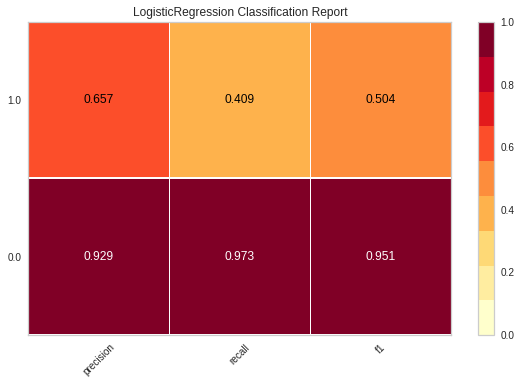

In [0]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

visualizer = ClassificationReport(model)
visualizer.fit(X, Y)
visualizer.score(X, Y)
visualizer.poof()

#### Generate Cross-Validated Precision and Recall

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

y_train_pred = cross_val_predict(model, X, Y, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Precision**

In [0]:
precision_score(Y, y_train_pred)

0.6702619414483821

**Recall**

In [0]:
recall_score(Y, y_train_pred)

0.3987167736021998

**F1 Score**

In [0]:
from sklearn.metrics import f1_score

In [0]:
f1_score(Y, y_train_pred)

0.5000000000000001

**AUC**

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y, y_train_pred)

0.68679871859545

### Demo AWS Machine Learning Service


**Evaluatate Model**


![Evaluating Model](https://user-images.githubusercontent.com/58792/49120960-a80e6580-f263-11e8-9413-98b52b811476.png)

**Explore Performance**


![Explore Performance](https://user-images.githubusercontent.com/58792/49121094-13583780-f264-11e8-9e17-5e0c20e23841.png)

* Evaluating Model
* Explore Performance

## 4.5 Tune a Model

### [Demo] AWS Machine Learning Service

* show tradeoffs

## 4.6 Understand ML Inference

### [Demo] AWS Machine Learning Service

* Refers to prediction
* Sagemaker can auto-scale inference endpoints
* Also Amazon Elastic Inference service:
  - Can save up to 75% of cost of inference (predictions)
  - Attaches to Sagemaker and EC2

## 4.7 Understand Deep Learning

### Intro to Deep Learning

[Intro to Deep Learning on AWS Video](https://www.aws.training/learningobject/video?id=16439&trk=gs_card)

#### Brief History of Neural Networks

* 1950-1998:  Academic Activity
* 1998-2007:  AI Winter
* 2007-Today:  "The GPU Era" (Moore's law over 2005)
* Deep Learning is a "multi-layered" feed-forward neural network




#### Perform Storm for Deep Learning

* Cloud Computing
* End of Moore's Law (forces more GPU adoption)
* Elastic Storage and Compute
* Proliferation of data:  social networks, etc


#### What is a Neural Network?




![DNN](https://user-images.githubusercontent.com/58792/48964488-45645380-ef5d-11e8-8c84-f3ab8b238689.png)

* Can be "Deep" Neural Network (multi-layered), but optional
* Simple functions than be collectively trained (in layers) to learn complex functions
* Input Layer --> Hidden Layer(s) ---> Output Layer

![RNN](https://user-images.githubusercontent.com/58792/48964874-08e92580-ef66-11e8-9c91-4e16ef98ed1a.png)

* RNN is used sequences like:  
  - text
  - speech
  - translation 

#### Deep Learning Use Cases

* Text analysis (NLP)
  - insider trading
  - sentiment analysis
  - regulatory compliance
  - brand affinity
  - intent analysis
  
* Time Series
  - financial
  - log analysis
  - supply chain
  - IoT
 
* Recommendation Engines 
  - Social Meida

### Deep Learning AMIs



* Three Styles of Deep Learning AMIs
  - Conda-based AMI
  - Base AMI
  - AMIs with source code
* Available "Pay as you Go" (On Demand)
* Available "Spot Instance"
* Can perform ["Multi-GPU training"](https://docs.aws.amazon.com/dlami/latest/devguide/keras-mxnet.html)
* Preloaded with Frameworks
![DL Frameworks](https://user-images.githubusercontent.com/58792/48965039-24562f80-ef6a-11e8-9dc2-1b384bbfc610.png)

